<a href="https://colab.research.google.com/github/Rocks-n-Code/PythonCourse/blob/master/5%20-%20Lasio%20%26%20Striplog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 - Lasio & Striplog 
## by Thomas Martin

Adapted from Thomas's talk at Transform 2020 - [Video](https://youtu.be/oytSwhqvKbc) - [Repo](https://github.com/ThomasMGeo/Transform2020)

![Thomas Martin](https://github.com/Rocks-n-Code/PythonCourse/blob/master/img/TM130160.jpg?raw=true)

[Thomas Martin](https://twitter.com/ThomasM_geo) is a graduate student at [Colorado School of Mines](https://www.mines.edu/), in the [CoRE](https://core.mines.edu/) research group. He is working on core-log automated interepertation using machine learning. Feel free to reach out on [twitter](https://twitter.com/ThomasM_geo) or catch him on the software underground slack! 


There are whole classes devoted to basic python syntax, loops, functions, etc. This class is to just get you up and running with some key basics that can help with basic projects. Join us on the slack for some pointers!

## Importing and Using Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Importing a few others that I use in (almost) every project. We can import them normally becuase Google pre-loaded them. Google does not pre-load everything that you need, sometimes you might need to install it.  ~*warning* ~ not every package can easily be imported in Colab. I have not figured out what makes some go and some not. But stats and plotting is usually pretty safe. Niche, one off, old, academic code, less so. 

In [2]:
!pip install lasio # the ! before the pip is important, also this is a shell command, not a python one

Just installed the lasio package using pip. Lasio is a .las file imput and output reader. It's a great way to read in a .las file (well logs, not LiDAR) to use in python. After installing it, you still need to import it. The github for lasio is [here](https://github.com/kinverarity1/lasio)

In [3]:
import lasio

There are hundreds of packages, not all of them work with Colab. We will install and import packages throughout the notebook.

# Well log input and output using lasio

lasio (.las input and output) is one of my all time favorite packages. It's updated often, and it works 99.5% of the time with .las files (well logs, not LiDAR data). The repo is [here](https://github.com/kinverarity1/lasio) on github. 

In [4]:
las = lasio.read('https://raw.githubusercontent.com/ThomasMGeo/Transform2020/master/t20-intro/4900722147_722147B.las')

We just read in a las file! Let's do a quick quaility control, and make some plots.

In [5]:
dir(las)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_index_unit_contains',
 '_text',
 'add_curve',
 'add_curve_raw',
 'append_curve',
 'append_curve_item',
 'curves',
 'curvesdict',
 'data',
 'delete_curve',
 'depth_ft',
 'depth_m',
 'df',
 'encoding',
 'get_curve',
 'header',
 'index',
 'index_unit',
 'insert_curve',
 'insert_curve_item',
 'items',
 'iteritems',
 'iterkeys',
 'itervalues',
 'json',
 'keys',
 'match_raw_section',
 'other',
 'params',
 'read',
 'sections',
 'set_data',
 'set_data_from_df',
 'stack_curves',
 'to_csv',
 'to_excel',
 'to_json',
 'to_json_old',
 'values',
 'version',
 'well',
 'write']

So there is a lot of stuff going on with the las object we just created. Which is awesome! But can be daunting to get into what you are looking for.

In [7]:
las.curves

[CurveItem(mnemonic="DEPT", unit="F", value="", descr="DEPTH (BOREHOLE) {F13.5}", original_mnemonic="DEPT", data.shape=(20587,)),
 CurveItem(mnemonic="AHO10", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A10 {F13.4}", original_mnemonic="AHO10", data.shape=(20587,)),
 CurveItem(mnemonic="AHO20", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A20 {F13.4}", original_mnemonic="AHO20", data.shape=(20587,)),
 CurveItem(mnemonic="AHO30", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A30 {F13.4}", original_mnemonic="AHO30", data.shape=(20587,)),
 CurveItem(mnemonic="AHO60", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A60 {F13.4}", original_mnemonic="AHO60", data.shape=(20587,)),
 CurveItem(mnemonic="AHO90", unit="OHMM", value="", descr="Array Induction One Foot Resistivity A90 {F13.4}", original_mnemonic="AHO90", data.shape=(20587,)),
 CurveItem(mnemonic="BS", unit="IN", value="", descr="Bit Size {F13.4}", or

Wow, this well has a lot of curves! OK, we are going to make a data frame for the data in the .las file. This will behave really similar to the previous data frame

In [8]:
data = las.df() # This time we named the dataframe data and not df
data.head()

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,DPHZ,EHGR,FCD,GR,HCAL,HDRA,HGR,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
DEPT,,,,,,,,,,,,,,,,,,,,,,,,,,,
264.57275,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,714.3266,94.4001,0.0157,-0.51861,-0.5117,62.9528,7.0,57.5765,8.7657,0.8911,61.5717,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.6761,903.50800
264.65608,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,706.3282,94.4001,0.0157,-0.51861,-0.5117,62.9528,7.0,57.5765,8.7657,0.8911,61.5717,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.5199,899.50816
264.73941,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,698.3297,94.4001,0.0157,-0.51861,-0.5117,61.1155,7.0,57.5765,8.7657,0.8911,59.7747,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.3636,895.50832
264.82274,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,690.3313,94.4001,0.0157,-0.51861,-0.5117,59.0108,7.0,57.5765,8.7657,0.8911,57.7162,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.2074,891.50848
264.90607,2.9255,3.2413,3.4473,3.7072,3.5825,8.75,682.3329,94.4001,0.0157,-0.51861,-0.5117,57.2754,7.0,57.5765,8.7657,0.8911,56.0189,0.1018,0.1102,0.4626,0.50474,9.98008,3.5057,0.09612,0.04418,-75.0511,887.50864


Scroll around! If you want to get a handle on stats of your well curves, using the describe function on a dataframe is awesome. 

In [9]:
data.to_csv('well_data.csv') # just saved it out!

Once this is in a data frame, you can export the curve data as a csv! This can be used in excel, spotfire, matlab or any other program you are more familiar with. This alone saves tons of time! While I prefer python, I know it's not for everyone.

In [10]:
data.describe()

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,DPHZ,EHGR,FCD,GR,HCAL,HDRA,HGR,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
count,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.00,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.0,20587.000000,20587.000000,20526.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20526.000000,20526.000000,20587.000000,20587.000000,20587.000000,20587.000000
mean,32.252442,34.950929,31.329049,27.927270,27.410640,8.75,676.743216,98.415896,0.604529,1.979741,1.983869,103.408938,7.0,98.657851,9.354361,0.020861,98.662439,32.480518,30.536038,0.354168,0.350520,2.633982,2.378150,75.528476,95.113983,-204.752749,1127.159692
std,128.857713,140.897812,103.180496,65.327454,62.005216,0.00,58.856309,2.063567,0.763592,33.070237,33.070029,29.508451,0.0,27.748973,0.762442,0.115197,28.603177,122.967020,110.639868,0.122171,0.109249,1.030962,0.243767,335.963370,427.417809,25.678274,169.538997
min,1.390700,1.575200,1.617800,1.696000,1.692500,8.75,-47.630800,94.400100,-5.538100,-1.199270,-0.801500,14.501400,7.0,14.818800,3.211900,-0.024500,13.126700,0.088000,0.098000,0.079420,0.101640,0.900000,1.207080,0.079030,0.044180,-258.340900,265.016600
25%,3.698500,4.027950,4.242050,4.588850,4.585250,8.75,657.181250,96.376600,0.322000,0.121195,0.130000,82.076900,7.0,78.332950,9.065300,-0.009400,78.283300,8.775450,7.776900,0.274150,0.276935,2.176795,2.323168,10.977510,11.351180,-218.790850,993.186120
50%,17.888500,18.315800,18.586600,18.668400,18.827100,8.75,677.837400,98.353000,0.570400,0.156360,0.160700,108.148800,7.0,102.271700,9.318800,-0.004600,102.443300,18.257100,18.035600,0.330620,0.328380,2.580130,2.392280,29.029920,29.143410,-201.691900,1135.970200
75%,29.044600,29.038150,29.255450,29.894550,29.507250,8.75,702.729100,100.329500,0.829150,0.198580,0.202400,124.792850,7.0,119.445750,9.579500,0.009400,119.703650,26.987650,26.212000,0.408290,0.406300,2.905518,2.450400,46.963240,48.894250,-186.484350,1265.619160
max,1950.000000,1950.000000,1699.496400,1294.100300,1097.065100,8.75,794.634900,100.329500,5.340600,607.212100,607.212100,217.478100,7.0,194.760500,14.090600,2.109400,211.141600,2065.122000,1849.720400,1.174630,1.200880,10.000000,4.628800,4896.128690,4960.920260,-74.894900,1634.082460


If you want different percentiles in df.describe, you can pass those values

In [11]:
data.describe(percentiles=[0.1, 0.5, 0.9])

,AHO10,AHO20,AHO30,AHO60,AHO90,BS,CDF,CTEM,DCAL,DPH8,DPHZ,EHGR,FCD,GR,HCAL,HDRA,HGR,HMIN,HMNO,HNPO,HTNP,PEF8,RHO8,RXO8,RXOI,SP,TENS
count,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.00,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.0,20587.000000,20587.000000,20526.000000,20587.000000,20587.000000,20587.000000,20587.000000,20587.000000,20526.000000,20526.000000,20587.000000,20587.000000,20587.000000,20587.000000
mean,32.252442,34.950929,31.329049,27.927270,27.410640,8.75,676.743216,98.415896,0.604529,1.979741,1.983869,103.408938,7.0,98.657851,9.354361,0.020861,98.662439,32.480518,30.536038,0.354168,0.350520,2.633982,2.378150,75.528476,95.113983,-204.752749,1127.159692
std,128.857713,140.897812,103.180496,65.327454,62.005216,0.00,58.856309,2.063567,0.763592,33.070237,33.070029,29.508451,0.0,27.748973,0.762442,0.115197,28.603177,122.967020,110.639868,0.122171,0.109249,1.030962,0.243767,335.963370,427.417809,25.678274,169.538997
min,1.390700,1.575200,1.617800,1.696000,1.692500,8.75,-47.630800,94.400100,-5.538100,-1.199270,-0.801500,14.501400,7.0,14.818800,3.211900,-0.024500,13.126700,0.088000,0.098000,0.079420,0.101640,0.900000,1.207080,0.079030,0.044180,-258.340900,265.016600
10%,3.184980,3.509000,3.688180,3.991140,3.986700,8.75,637.930820,96.376600,0.160920,0.076676,0.086660,62.570360,7.0,60.979180,8.903840,-0.011800,59.607200,7.311280,6.476320,0.241558,0.247488,1.901610,2.248325,9.123478,9.566218,-239.552500,905.932832
50%,17.888500,18.315800,18.586600,18.668400,18.827100,8.75,677.837400,98.353000,0.570400,0.156360,0.160700,108.148800,7.0,102.271700,9.318800,-0.004600,102.443300,18.257100,18.035600,0.330620,0.328380,2.580130,2.392280,29.029920,29.143410,-201.691900,1135.970200
90%,43.416000,45.704660,45.920180,47.533120,46.893140,8.75,723.437400,100.329500,1.174340,0.245968,0.251200,136.347920,7.0,128.798960,9.927100,0.050050,130.638420,37.413980,36.193220,0.458994,0.446972,3.113760,2.523935,82.309720,91.293292,-182.544800,1340.929328
max,1950.000000,1950.000000,1699.496400,1294.100300,1097.065100,8.75,794.634900,100.329500,5.340600,607.212100,607.212100,217.478100,7.0,194.760500,14.090600,2.109400,211.141600,2065.122000,1849.720400,1.174630,1.200880,10.000000,4.628800,4896.128690,4960.920260,-74.894900,1634.082460


If you want to save out this table as a csv, you can do that in one line:

In [12]:
data.describe().to_csv("petro-stats.csv")

In [13]:
data.AHO10.min() # If you just want one of the stats

1.3907

Let's use the quantile function to make some quick cutoffs (will be used in the future).

In [14]:
lowGR = data.GR.quantile(.20)
lowGR

72.89142

In [15]:
highRES = data.AHO90.quantile(.95)
highRES

67.7296

Feel free to make your own cutoffs here!

### Plotting up well log data

Text(0, 0.5, 'Deep Resistivity')

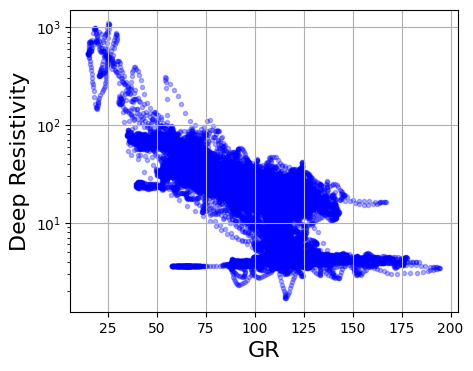

In [16]:
# Cross plot comparing GR to Deep Resistivity
plt.figure(figsize=(5,4), dpi=100) # figure size and dpi you can set here
plt.scatter(data.GR.values, data.AHO90.values, color='blue', marker='.', alpha=0.3)
plt.yscale('log') #log scale for Y axis

plt.grid(True)
plt.xlabel('GR', size=16)
plt.ylabel('Deep Resistivity', size=16)

Text(0, 0.5, 'Count')

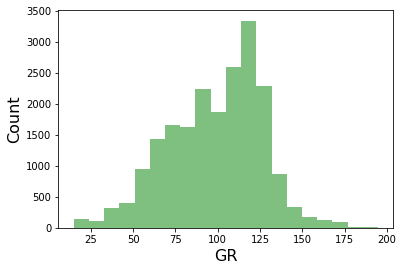

In [17]:
# lets make a histogram of the GR Curve, with 20 bins, in green
plt.hist(data.GR.values, bins = 20, color='g', alpha = 0.5)
plt.xlabel('GR', size=16)
plt.ylabel('Count', size=16)

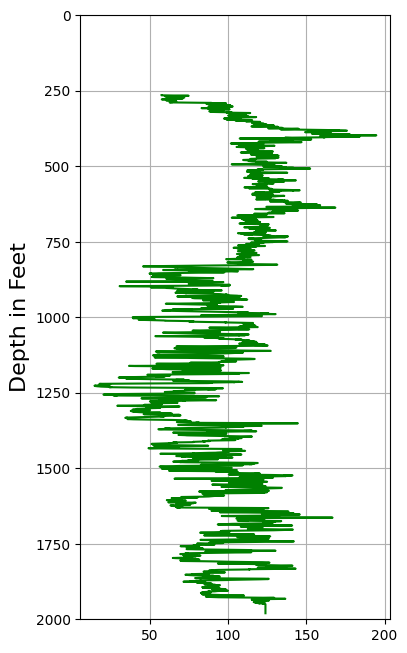

In [18]:
# line plot of the Gamma curve
plt.figure(figsize=(4,8), dpi=100)
plt.plot(data.GR.values, data.index, color='g')
plt.ylabel('Depth in Feet', size=16)
plt.ylim(2000,0)
plt.grid(True)


Let's add a depth track for deep resistivity, a title and a few other additional widigits. Also we will use the well name for the title:

In [19]:
las.header['Well'].WELL.value # we can pull the well name directly from the header

'AR FEE 1791 15-23'

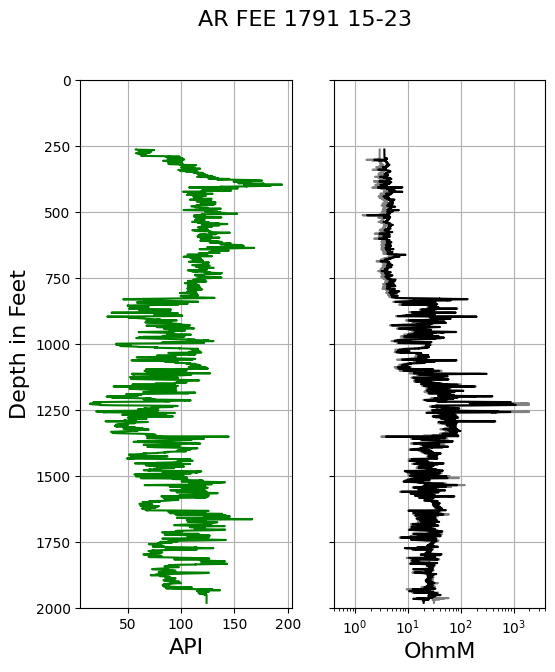

In [20]:
# line plot of the Gamma curve
plt.figure(figsize=(6,7), dpi=100)

plt.suptitle(las.header['Well'].WELL.value, size =16) # overall title

plt.subplot(121) # if we are going to make two plots, matplotlib calls it a subplot
plt.plot(data.GR.values, data.index, color='g') # the actual plot!
plt.ylabel('Depth in Feet', size=16)
plt.xlabel('API', size=16)
plt.ylim(2000,0) # the limit is reversed to go deep down
plt.grid(True) # Turning the grid on

plt.subplot(122)
plt.plot(data.AHO10.values, data.index, color='grey')
plt.plot(data.AHO90.values, data.index, color='black')
plt.xscale('log')
plt.grid(True)
plt.xlim(0.4,4000)
plt.ylim(2000,0)
plt.xlabel('OhmM', size=16)
plt.tick_params(labelleft=False)  

plt.savefig('awesome-plot.pdf', dpi=200)

Let's add a pay flag, remember the cutoffs we calcualted above? Let's use those. Using pythonic nomenclature, we will set a true flag, only when both conditions are met.

In [21]:
payMapper = (data.GR.values <= lowGR) & (data.AHO90.values >= highRES)
np.unique(payMapper)

array([False,  True])

If we want to see how many true and false statements there are:

In [22]:
np.bincount(payMapper) # your specific numbers might be a bit different

array([19597,   990])

So the GR values have to be below the cutoff, and resistivity have to be above the cutoff.

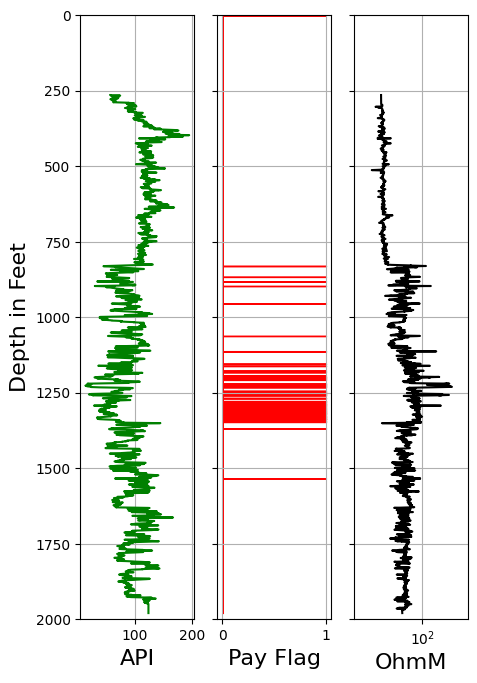

In [23]:
# line plot of the Gamma curve
plt.figure(figsize=(5,8), dpi=100)

plt.subplot(131) # the subplot changed to allow for 3 columns
plt.plot(data.GR.values, data.index, color='g')
plt.ylabel('Depth in Feet', size=16)
plt.xlabel('API', size=16)
plt.ylim(2000,0)
plt.grid(True)

plt.subplot(132) # this is the new pay flag plot
plt.fill_between(payMapper, data.index, color='red') # used fill between, not plot
plt.ylim(2000,0)
plt.tick_params(labelleft=False)  
plt.xlabel('Pay Flag', size=16)
plt.grid(True)

plt.subplot(133)
plt.plot(data.AHO90.values, data.index, color='black')
plt.xscale('log')
plt.grid(True)
plt.xlim(0.4,4000)
plt.ylim(2000,0)
plt.xlabel('OhmM', size=16)
plt.tick_params(labelleft=False)  



Little heavy on the pay flag! But a good template for future work. Can be used for any sort of cutoff, or statistical analysis. Mess around with a plot below!

# Striplog

Striplog is an awesome package for  basic graphic logs, stratigraphic information, formations, and other geo stuff. The github is [here](https://github.com/agile-geoscience/striplog). This heavily borrows from [tutorials](https://github.com/agile-geoscience/striplog/tree/master/tutorial).

In [24]:
!pip install striplog

     |████████████████████████████████| 81kB 3.3MB/s 
  Created wheel for striplog: filename=striplog-0.8.8-cp37-none-any.whl size=83655 sha256=5e0f7fd0b8231bb2992dd4b63e9c2f65b02c795bbe706aa227c9a01846202e1c
  Stored in directory: /root/.cache/pip/wheels/f2/24/74/bd0c5947a61b8891bf41a3c7e7e3de470382315c1fae297402
Successfully built striplog


In [25]:
import striplog
striplog.__version__ #if this fails, just re run the above cells

'0.8.8'

### Lexicon

Striplog has a lot of geowords already preloaded. Think sand, shale, mudstone, salt, etc:

In [26]:
from striplog import Lexicon
print(Lexicon.__doc__)


    A Lexicon is a dictionary of 'types' and regex patterns.

    Most commonly you will just load the default one.

    Args:
        params (dict): The dictionary to use. For an example, refer to the
            default lexicon in ``defaults.py``.
    


In [27]:
lexicon = Lexicon.default()
lexicon #scroll around!

{'lithology': ['overburden', 'sandstone', 'siltstone', 'shale', 'conglomerate', 'mudstone', 'limestone', 'dolomite', 'salt', 'halite', 'anhydrite', 'gypsum', 'sylvite', 'clay', 'mud', 'silt', 'sand', 'gravel', 'boulders'], 'modifier': ['silty', 'sandy', 'shale?y', 'muddy', 'pebbly', 'gravell?y'], 'amount': ['streaks?', 'veins?', 'stringers?', 'interbed(?:s|ded)?', 'blotch(?:es)?', 'bands?', 'fragments?', 'impurit(?:y|ies)', 'abundant', 'minor', 'some', 'rare', 'flakes?', 'trace', '[-.\\d]+%', '[-.\\d]+pc', '[-.\\d]+per ?cent'], 'grainsize': ['vf(?:-)?', 'f(?:-)?', 'm(?:-)?', 'c(?:-)?', 'vc', 'very fine(?: to)?', 'fine(?: to)?', 'medium(?: to)?', 'coarse(?: to)?', 'very coarse', 'v fine(?: to)?', 'med(?: to)?', 'med.(?: to)?', 'v coarse', 'grains?', 'granules?', 'pebbles?', 'cobbles?', 'boulders?'], 'colour': ['red(?:dish)?', 'gray(?:ish)?', 'grey(?:ish)?', 'black(?:ish)?', 'whit(?:e|ish)', 'blu(?:e|ish)', 'purpl(?:e|ish)', 'yellow(?:ish)?', 'green(?:ish)?', 'brown(?:ish)?', 'light', 'd

In [28]:
lexicon.synonyms

{'Anhydrite': ['Gypsum'],
 'Overburden': ['Drift'],
 'Salt': ['Halite', 'Sylvite']}

These abbrevations are common for mudlogs, there is a great turtorial on the github if you are interested in that

In [29]:
s = "grysh gn ss w/ sp gy sh"
lexicon.expand_abbreviations(s)

'greyish green sandstone with spotty gray shale'

### Componet

In [30]:
from striplog import Component

In [31]:
print(Component.__doc__)


    Initialize with a dictionary of properties. You can use any
    properties you want e.g.:

        - lithology: a simple one-word rock type
        - colour, e.g. 'grey'
        - grainsize or range, e.g. 'vf-f'
        - modifier, e.g. 'rippled'
        - quantity, e.g. '35%', or 'stringers'
        - description, e.g. from cuttings
    


We define a new rock with a Python dict object:

In [32]:
r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand'}
rock = Component(r)
rock

colour,grey
grainsize,vf-f
lithology,sand


You can now call these componets!

In [33]:
rock['colour'] # who spelled this?! < Matt Hall/>

'grey'

In [34]:
rock.summary()

'Grey, vf-f, sand'

In [35]:
rock.summary(fmt="My rock: {lithology} ({colour}, {grainsize!u})")

'My rock: sand (grey, VF-F)'



The formatting supports the usual s, r, and a:

    s: str
    r: repr
    a: ascii

Also some string functions:

    u: str.upper
    l: str.lower
    c: str.capitalize
    t: str.title

And some numerical ones, for arrays of numbers:

    + or ∑: np.sum
    m or µ: np.mean
    v: np.var
    d: np.std
    x: np.product



### Position

Positions define points in the earth, like a top, but with uncertainty. You can define:

    upper — the highest possible location
    middle — the most likely location
    lower — the lowest possible location
    units — the units of measurement
    x and y — the x and y location (these don't have uncertainty, sorry)
    meta — a Python dictionary containing anything you want

Positions don't have a 'way up'.

In [36]:
from striplog import Position
print(Position.__doc__)


    Used to represent a position: a top or base.

    Not sure whether to go with upper-middle-lower or z_max, z_mid, z_min.
    Sticking to upper and lower, because ordering in Intervals is already
    based on 'above' and 'below'.
    


In [37]:
params = {'upper': 95,
          'middle': 100,
          'lower': 110,
          'meta': {'kind': 'erosive', 'source': 'DOE'}
          }

p = Position(**params)
p

upper,95.0
middle,100.0
lower,110.0


Even if you don't give a middle, you can always get z: the central, most likely position:

In [38]:
params = {'upper': 75, 'lower': 85}
p = Position(**params)
p

upper,75.0
middle,
lower,85.0


In [39]:
p.z

80.0

## Let's make a striplog!

I just introduced a bunch of boring things about dictionaries, etc. What makes this nice once you get it setup, is you can make some templates for common formations and lithotypes. We are going to do a simple one from this [github](https://github.com/ThomasMGeo/CSV2Striplog)

In [40]:
from striplog import Lexicon, Decor, Component, Legend, Interval, Striplog


### Make a legend

Most of the stuff in the dicts you made were about display — so they are going to make Decor objects. A collection of Decors makes a Legend. A Legend determines how a striplog is displayed.

First I'll make the components, since those are easy. I'll move 'train' into there too, since it is to do with the rocks, not the display. If it seems weird having 'train' in the Component (which is really supposed to be about direct descriptions of the rock, but the idea is that it's always the same for all specimens of that rock so it does fit here) then you could put it in data instead.


In [41]:
facies = {
    's': Component({'lithology': 'sandstone', 'train':'y'}),
    'i': Component({'lithology': 'interbedded', 'train':'y'}),
    'sh': Component({'lithology': 'shale', 'train':'y'}),
}

The next block of text could be less lines of code. The indenting is just a way to make it easier to read. Everyone has there own style of programming. We are just setting the decor of our future striplog plot. 

In [42]:
sandstone = Decor({
    'component': facies['s'],
    'colour': 'yellow',
    'hatch': '.',
    'width': '3',
})

interbedded = Decor({
    'component': facies['i'],
    'colour': 'darkseagreen',
    'hatch': '--',
    'width': '2',
})

shale = Decor({
    'component': facies['sh'],
    'colour': 'darkgray',
    'hatch': '-',
    'width': '1',
})


In [43]:
legend = Legend([sandstone, interbedded, shale])
legend

Legend(Decor({'component': Component({'lithology': 'sandstone', 'train': 'y'}), '_colour': '#ffff00', 'hatch': '.', 'width': 3.0})
Decor({'component': Component({'lithology': 'interbedded', 'train': 'y'}), '_colour': '#8fbc8f', 'hatch': '--', 'width': 2.0})
Decor({'component': Component({'lithology': 'shale', 'train': 'y'}), '_colour': '#a9a9a9', 'hatch': '-', 'width': 1.0}))

In [70]:
#Read in file to Colab instance
loc = 'https://raw.githubusercontent.com/ThomasMGeo/Transform2020/master/t20-intro/t20-lith.csv'
lith = pd.read_csv(loc)
lith.to_csv('t20-lith.csv',
            index=False)

In [71]:
strip = Striplog.from_csv('t20-lith.csv')
strip[0]

Interval({'top': Position({'middle': 2200.0, 'units': 'm'}), 'base': Position({'middle': 2300.3289999999997, 'units': 'm'}), 'description': '', 'data': {'lithology': 's'}, 'components': []})


##Deal with lithology¶

The lithology has been turned into a component, but it's using the abbreviation... I can't figure out an elegant way to deal with this so, for now, we'll just loop over the striplog and fix it. We read the data item's lithology ('s' in the top layer), then look up the correct lithology name in our abbreviation dictionary, then add the new component in the proper place. Finally, we delete the data we had.


In [72]:
strip[0].data

{'lithology': 's'}

In [73]:
for s in strip:
    lith = s.data['lithology']
    s.components = [facies[lith]]
    s.data = {}
# Run once, not twice

In [74]:
strip[0]

Interval({'top': Position({'middle': 2200.0, 'units': 'm'}), 'base': Position({'middle': 2300.3289999999997, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'train': 'y'})]})

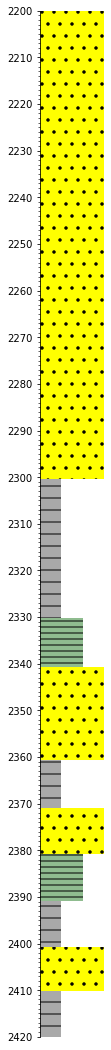

In [75]:
strip.plot(legend)

Just plotted a simple strip log from a CSV! You can make striplogs 100 different ways, and I highly reccomend the turtorials on the github for more exploration. Striplog is a fun package to dig into (pun intended) as it forces you to think about how this data is stored, managed, and used.